In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv("Abnb_paris.csv",index_col=0)
df.head()

,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."


In [41]:
df['sentiment']

1     3.208943
2     2.245883
3     2.509137
4     2.864322
5     1.892305
        ...   
70    1.735375
71    2.917489
72    2.110690
74    2.882002
75    1.371467
Name: sentiment, Length: 66, dtype: float64

Preprocessing the Text Data

In [42]:
#dropping columns 'logreview' and 'logsavwish'
df=df.drop(columns=['logsavwish','logreviews'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1 to 75
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews       66 non-null     int64  
 1   savwish       66 non-null     int64  
 2   price         66 non-null     int64  
 3   rating        66 non-null     float64
 4   accommodates  66 non-null     int64  
 5   extpeop       66 non-null     int64  
 6   min_stay      66 non-null     int64  
 7   sentiment     66 non-null     float64
 8   secdep        66 non-null     int64  
 9   cleanfee      66 non-null     int64  
 10  weekfee       66 non-null     int64  
 11  monthfee      66 non-null     int64  
 12  bedroom       66 non-null     int64  
 13  bathroom      66 non-null     int64  
 14  beds          66 non-null     int64  
 15  review_text   66 non-null     object 
dtypes: float64(2), int64(13), object(1)
memory usage: 8.8+ KB


In [43]:
!pip install nltk

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review

def clean_review(review):
    clean_words = []
    splitReview = review.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    clean_review = " ".join(clean_words)
    return clean_review

df["review_text"] = df["review_text"].apply(reviewParse).apply(clean_review)

In [46]:
df['review_text']

1     even stayed another apartment stay perfect nic...
2     exactly see pictures plus tiny worthwhile balc...
3     we five colleagues staying leas apartment trai...
4     it perfect the location great easy find eric h...
5     saras flat nice clean perfect host the perfect...
                            ...                        
70    this first time using airbnb great experience ...
71    phillipe thanks much lovely stay the marais lo...
72    we arrived late leece due trains completely ho...
74    we really felt home nicely decorated appartmen...
75    fantastic stay jane lovely apartment lovely pa...
Name: review_text, Length: 66, dtype: object

In [47]:
df.head()

,reviews,savwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
1,10,1277,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,even stayed another apartment stay perfect nic...
2,8,279,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,exactly see pictures plus tiny worthwhile balc...
3,31,434,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,we five colleagues staying leas apartment trai...
4,65,784,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,it perfect the location great easy find eric h...
5,9,621,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,saras flat nice clean perfect host the perfect...


In [48]:
df.loc[df["review_text"] == ""] #Checks for empty review strings

,reviews,savwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text


In [49]:
pos = [5]
neg = [1, 2]
neu = [3, 4]

def sentiment(rating):
  if rating in pos:
    return 2
  elif rating in neg:
    return 0
  else:
    return 1
df['Sentiment_Label'] = df['rating'].apply(sentiment)
df.head()

,reviews,savwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text,Sentiment_Label
1,10,1277,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,even stayed another apartment stay perfect nic...,1
2,8,279,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,exactly see pictures plus tiny worthwhile balc...,2
3,31,434,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,we five colleagues staying leas apartment trai...,2
4,65,784,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,it perfect the location great easy find eric h...,1
5,9,621,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,saras flat nice clean perfect host the perfect...,1


In [50]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.Sentiment_Label.value_counts().index, y=df.Sentiment_Label.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector=TfidfVectorizer(use_idf=True, max_features = 20000)

tfidfVector=vector.fit_transform(df['review_text'])

In [52]:
X = tfidfVector.toarray()
Y = df['Sentiment_Label']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Splitting data into training (70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


nb_model = MultinomialNB()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier(algorithm='SAMME')
stacking_models = [
    ('nb', nb_model),
    ('dt', dt_model),
    ('svm', svm_model)
]
meta_model = LogisticRegression()

rf_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
stacking_model = StackingClassifier(estimators=stacking_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Evaluating individual base models
nb_pred = nb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Evaluating ensemble models
rf_pred = rf_model.predict(X_test)
adaboost_pred = adaboost_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_pred))
print("Stacking Accuracy:", accuracy_score(y_test, stacking_pred))


X_train shape: (46, 5156)
X_test shape: (20, 5156)
y_train shape: (46,)
y_test shape: (20,)
Naive Bayes Accuracy: 0.35
Decision Tree Accuracy: 0.5
SVM Accuracy: 0.35
Random Forest Accuracy: 0.4
AdaBoost Accuracy: 0.65
Stacking Accuracy: 0.35


In [54]:
from sklearn.metrics import classification_report

# Base models Classification Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print()

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print()

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print()

# Ensemble models Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print()

print("AdaBoost Classification Report:")
print(classification_report(y_test, adaboost_pred))
print()

print("Stacking Classification Report:")
print(classification_report(y_test, stacking_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.31      0.44        13
           2       0.40      0.86      0.55         7

    accuracy                           0.50        20
   macro avg       0.60      0.58      0.49        20
weighted avg       0.66      0.50      0.48        20


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.17    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

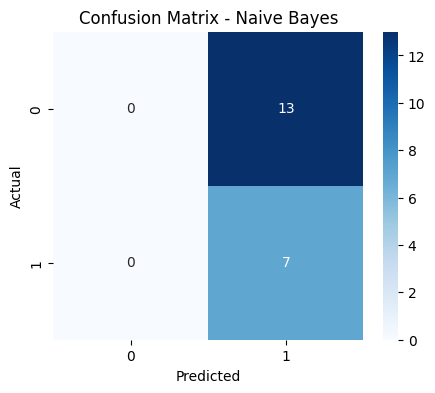

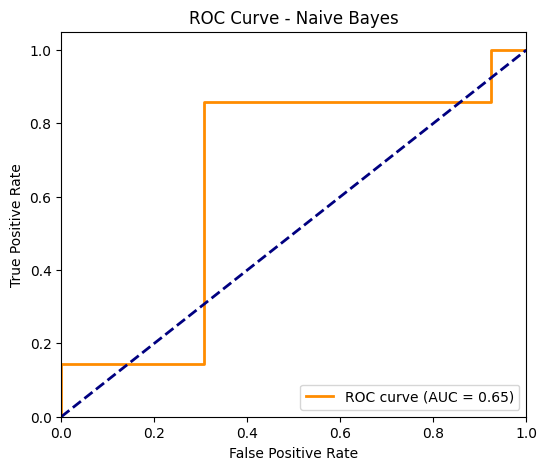

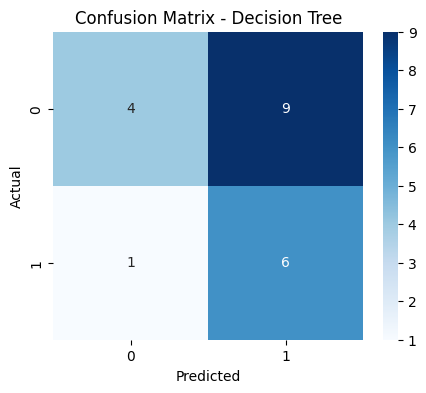

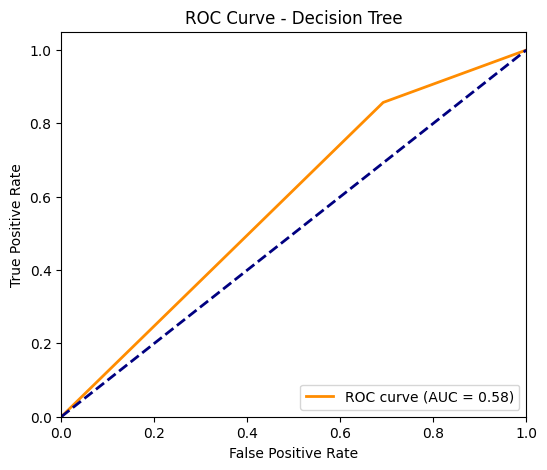

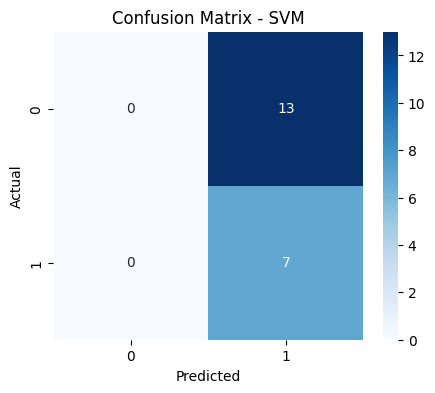

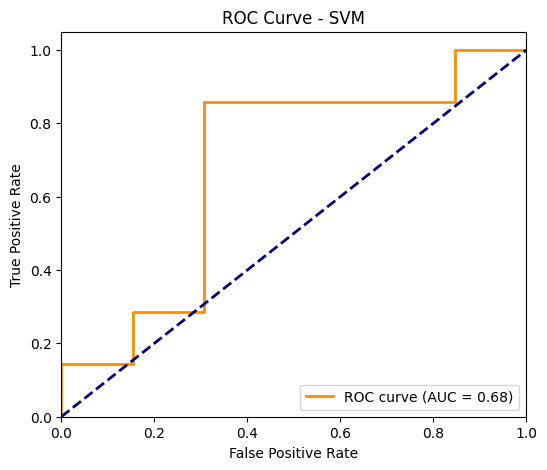

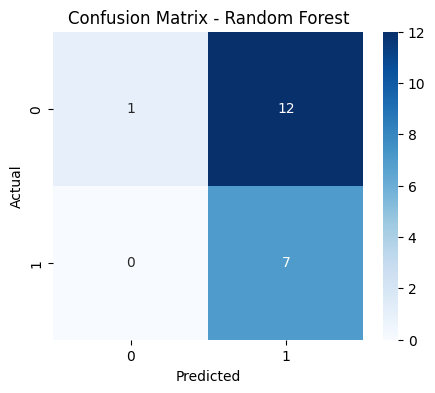

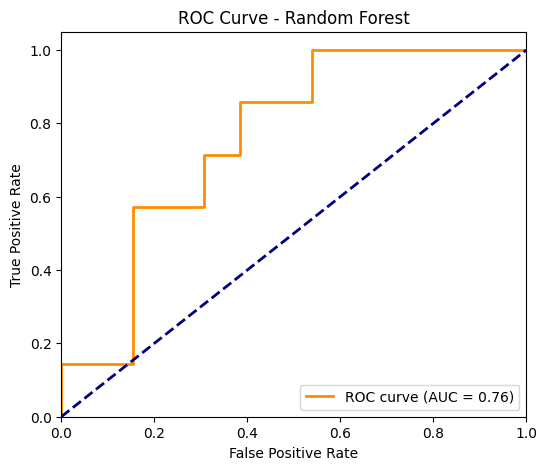

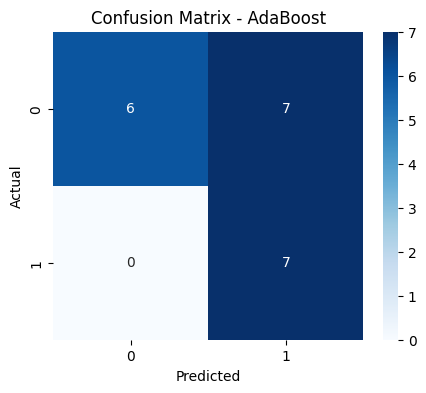

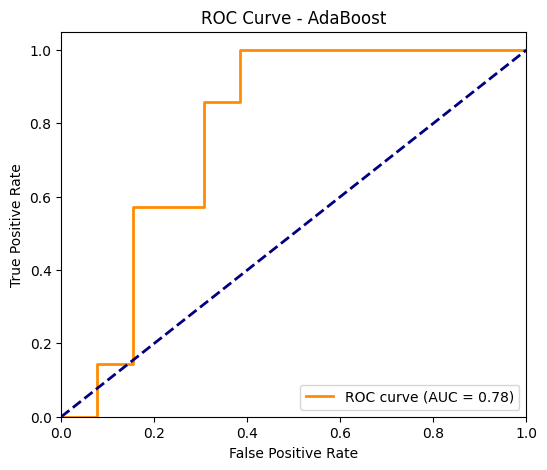

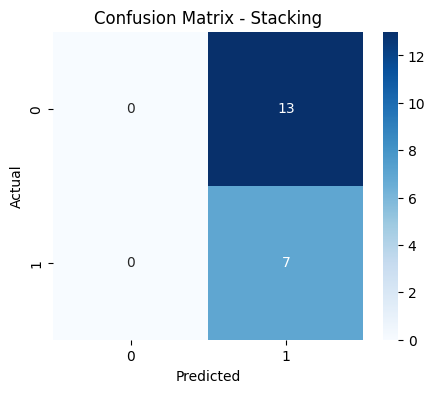

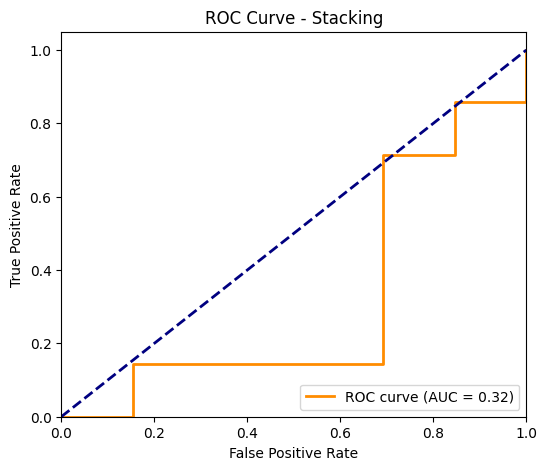

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=2)  # As 2 class is positive class
    auc = roc_auc_score(y_true, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()




# Plotting confusion matrix and ROC curve for Naive Bayes
plot_confusion_matrix(y_test, nb_pred, title="Confusion Matrix - Naive Bayes")
plot_roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1], title="ROC Curve - Naive Bayes")

# Plotting confusion matrix and ROC curve for Decision Tree
plot_confusion_matrix(y_test, dt_pred, title="Confusion Matrix - Decision Tree")
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], title="ROC Curve - Decision Tree")

# Plotting confusion matrix and ROC curve for SVM
plot_confusion_matrix(y_test, svm_pred, title="Confusion Matrix - SVM")
plot_roc_curve(y_test, svm_model.decision_function(X_test), title="ROC Curve - SVM")


# Plotting confusion matrix and ROC curve for Random Forest
plot_confusion_matrix(y_test, rf_pred, title="Confusion Matrix - Random Forest")
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], title="ROC Curve - Random Forest")

# Plotting confusion matrix and ROC curve for AdaBoost
plot_confusion_matrix(y_test, adaboost_pred, title="Confusion Matrix - AdaBoost")
plot_roc_curve(y_test, adaboost_model.predict_proba(X_test)[:, 1], title="ROC Curve - AdaBoost")

# Plotting confusion matrix and ROC curve for Stacking
plot_confusion_matrix(y_test, stacking_pred, title="Confusion Matrix - Stacking")
plot_roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1], title="ROC Curve - Stacking")
